# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [4]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [45]:
# keep the random seed

# create a series with the specified dates
dates = pd.date_range(start='2017-01-01', end='2018-03-31')


In [46]:
# store the parameters

np.random.seed(11225)

Mu = 5
Theta = 0.7
Y0 = 8
error = np.random.normal(0,2,len(dates))

In [47]:
# generate the time series according to the formula
TS = [None] * len(dates)
y = Y0
for i, v in enumerate(dates):
    TS[i] = Mu + y * Phi + error[i]
    y = TS[i] - Mu
    
df = pd.DataFrame({'TS':TS}, index = dates)

Plot the time series and verify what you see

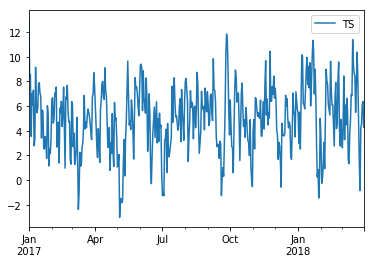

In [48]:
# plot here
df.plot()

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

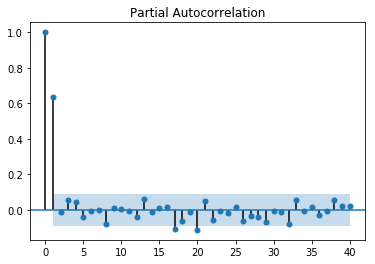

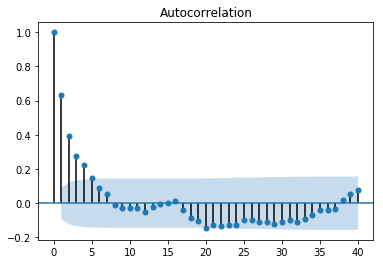

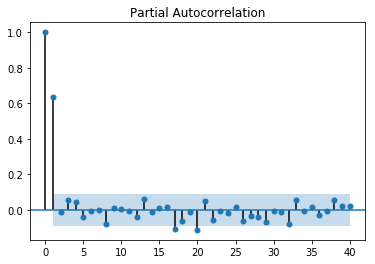

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.TS, lags=40)
plot_pacf(df.TS, lags=40)

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [40]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

series=df.TS

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                     TS   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Thu, 20 Jun 2019   AIC                           1943.395
Time:                        20:39:34   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.TS       0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [54]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range(start='2015-04-30', end='2015-08-31')

# store the parameters
Mu = 7
Theta = 0.9
error = np.random.normal(0,4,len(dates))

#generate the time series
TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = Mu + Theta * error_prev +error[i]
    error_prev = error[i]
    
df2=pd.DataFrame({'TS':TS}, index=dates)

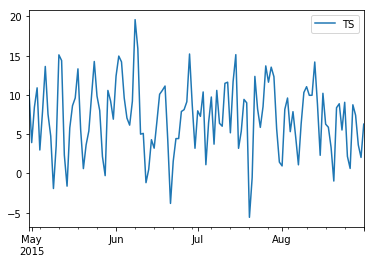

In [55]:
# Plot the time series
df2.plot()

## Look at the ACF and PACF of your model and write down your conclusions

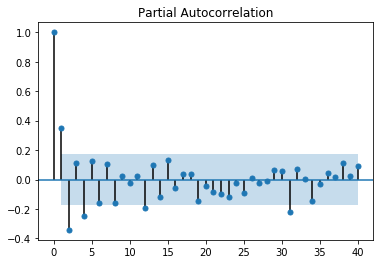

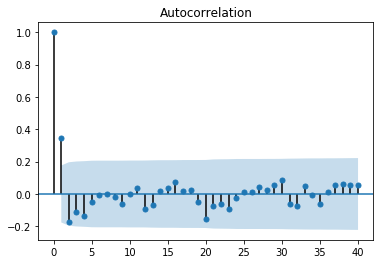

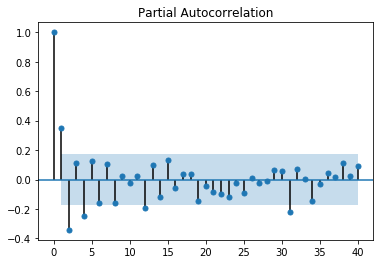

In [56]:
# plots here
plot_acf(df2,lags=40)
plot_pacf(df2,lags=40)

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [60]:
# Fit an AR(1) model to the first simulated data
series=df.TS

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

# Print out summary information on the fit


                              ARMA Model Results                              
Dep. Variable:                     TS   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Thu, 20 Jun 2019   AIC                           1943.395
Time:                        20:51:37   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.TS       0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [ ]:
# the data is in "winning_400m.csv"

Plot the data

In [ ]:
# your code here

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [ ]:
# your code here

In [ ]:
# Look at ACF and PACF

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [ ]:
# your code here

In [ ]:
# Try another one

## What is your final model? Why did you pick this model?

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.